In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/vgames2.csv')
df = df.drop(['Unnamed: 0'], axis=1) # 불필요한 열 제거
print("데이터 개수, 결측치, 데이터 타입 확인\n")
df.info()
print("\n결측치 비율(%)\n" + str(df.isnull().sum() / df.shape[0] *100))

# 결측치 비율 확인 결과 분석에 큰 영향을 미치지 않을 것으로 보이므로 결측치는 모두 제거
df = df.dropna()
df = df.reset_index(drop=True)

df

데이터 개수, 결측치, 데이터 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB

결측치 비율(%)
Name           0.000000
Platform       0.000000
Year           1.632727
Genre          0.301241
Publisher      0.349440
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64


,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [ ]:
# 출고량 데이터 숫자단위 통일 및 숫자 타입으로 타입 변경
def unify_sales(sales):
  if str(sales).find('K') != -1:
    return float(str(sales).replace('K', ''))*1000
  elif str(sales).find('M') != -1:
    return float(str(sales).replace('M',''))*1000000
  else:
    return float(str(sales))*1000000
  
sales_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in sales_col:
  df[col] = df[col].apply(unify_sales)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0
...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0


In [ ]:
# 연도 데이터의 일부가 4자리가 아닌 2자리로 표현되어 모두 4자리로 통일
def unify_year(year):
  if year < 10:
    return float("200" + str(year))
  elif year < 50:
    return float("20" + str(year))
  elif year <100:
    return float("19" + str(year))
  else:
    return year

df['Year'] = df['Year'].apply(unify_year)
print("연도 최솟값 : " + str(df['Year'].min()) + " 연도 최댓값 : " + str(df['Year'].max())) # 연도 데이터 통일 후 연도 범위 확인

연도 최솟값 : 1980.0 연도 최댓값 : 2020.0


In [ ]:
# 지역별이 아닌 글로벌 총 판매량을 나타내는 Global_Sales 열 생성
df['Global_Sales'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

# 5년 단위로 데이터를 분석하기 위해 Demi_Decade 열 생성
def sort_year_decade(year):
  if year < 1985:
    return "1980-1985"
  elif year < 1990:
    return "1985-1990"
  elif year < 1995:
    return "1990-1995"
  elif year < 2000:
    return "1995-2000"
  elif year < 2005:
    return "2000-2005"
  elif year < 2010:
    return "2005-2010"
  elif year < 2015:
    return "2010-2015"
  else:
    return "2015-2020"

df['Demi_Decade'] = df['Year'].apply(sort_year_decade)
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Demi_Decade
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,40000.0,0.0,0.0,0.0,40000.0,2005-2010
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0,180000.0,2005-2010
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.0,0.0,20000.0,0.0,20000.0,2010-2015
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,40000.0,0.0,0.0,0.0,40000.0,2010-2015
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0,250000.0,2010-2015
...,...,...,...,...,...,...,...,...,...,...,...
16236,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,150000.0,40000.0,0.0,10000.0,200000.0,2005-2010
16237,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,10000.0,0.0,0.0,0.0,10000.0,2005-2010
16238,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,440000.0,190000.0,30000.0,130000.0,790000.0,2015-2020
16239,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,50000.0,50000.0,250000.0,30000.0,380000.0,2010-2015


1. 지역에 따라서 선호하는 게임 장르가 다를까

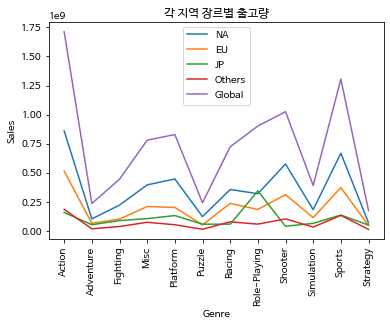

In [ ]:
# 각 지역별(글로벌 포함) 장르별 판매량 lineplot 시각화

import matplotlib.pyplot as plt

df_genre = df.groupby('Genre')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

fig, ax = plt.subplots()
ax.plot(df_genre.index, "NA_Sales", data=df_genre, label="NA")
ax.plot(df_genre.index, "EU_Sales", data=df_genre, label="EU")
ax.plot(df_genre.index, "JP_Sales", data=df_genre, label="JP")
ax.plot(df_genre.index, "Other_Sales", data=df_genre, label="Others")
ax.plot(df_genre.index, "Global_Sales", data=df_genre, label="Global")
plt.title('각 지역 장르별 출고량')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

상단의 그래프를 보면 대부분의 지역에서는 Action, Sports, Shooter 장르가 인기있는 것을 확인해볼 수 있다
그런데 일본의 경우만 예외적으로 Role-Playing 장르가 가장 인기있는 것을 확인할 수 있다
다만 일본의 경우만 예외적이므로 이것이 통계적으로 의미가 있는지 검증해볼 필요성이 있다

In [ ]:
from scipy.stats import chisquare

print('[p-value]')
print("Global과 비교 : ",chisquare(df_genre.JP_Sales, df_genre.Global_Sales)[1])
print("NA와 비교 : ",chisquare(df_genre.JP_Sales, df_genre.NA_Sales)[1])
print("EU와 비교 : ",chisquare(df_genre.JP_Sales, df_genre.EU_Sales)[1])
print("Other과 비교 : ",chisquare(df_genre.JP_Sales, df_genre.Other_Sales)[1])

[p-value]
Global과 비교 :  0.0
NA와 비교 :  0.0
EU와 비교 :  0.0
Other과 비교 :  0.0


상단은 일본과 Global 및 다른 지역 간 장르별 판매량에 대해 카이제곱 독립성 검정을 시행한 결과이다

귀무가설 :  일본의 장르별 판매량 분포와 Global 및 각 지역의 장르별 판매량 분포의 차이가 없다

대립가설 : 일본의 장르별 판매량 분포와 Global 및 각 지역의 장르별 판매량 분포의 차이가 있다

결과를 보면 모두 p-value 값이 0이므로 귀무가설을 기각하고 대립가설을 채택할 수 있다

즉 일본의 경우만 예외적으로 Role-Playing 장르가 가장 인기있는 것은 통계적으로 유의미하다

2. 연도별 게임의 트렌드가 있을까

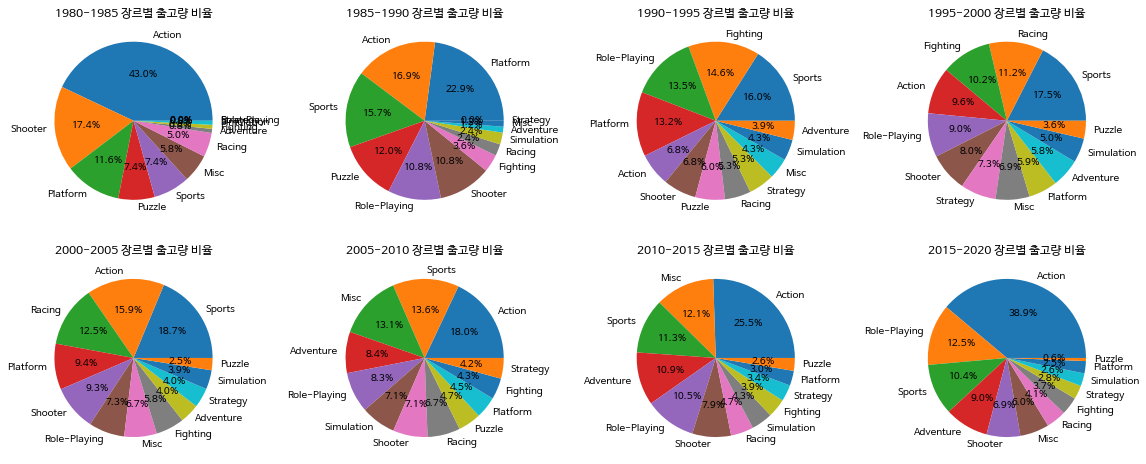

In [ ]:
# 5년 단위의 장르 트렌드 분석

df_genre_demidecade = pd.crosstab(df.Genre, df.Demi_Decade)
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 8))
plt.subplot(2,4,1)
plt.pie(df_genre_demidecade.sort_values(by='1980-1985', ascending=False)['1980-1985'],labels=df_genre_demidecade.sort_values(by='1980-1985', ascending=False).index, autopct='%.1f%%')
plt.title("1980-1985 장르별 출고량 비율")
plt.subplot(2,4,2)
plt.pie(df_genre_demidecade.sort_values(by='1985-1990', ascending=False)['1985-1990'],labels=df_genre_demidecade.sort_values(by='1985-1990', ascending=False).index, autopct='%.1f%%')
plt.title("1985-1990 장르별 출고량 비율")
plt.subplot(2,4,3)
plt.pie(df_genre_demidecade.sort_values(by='1990-1995', ascending=False)['1990-1995'],labels=df_genre_demidecade.sort_values(by='1990-1995', ascending=False).index, autopct='%.1f%%')
plt.title("1990-1995 장르별 출고량 비율")
plt.subplot(2,4,4)
plt.pie(df_genre_demidecade.sort_values(by='1995-2000', ascending=False)['1995-2000'],labels=df_genre_demidecade.sort_values(by='1995-2000', ascending=False).index, autopct='%.1f%%')
plt.title("1995-2000 장르별 출고량 비율")
plt.subplot(2,4,5)
plt.pie(df_genre_demidecade.sort_values(by='2000-2005', ascending=False)['2000-2005'],labels=df_genre_demidecade.sort_values(by='2000-2005', ascending=False).index, autopct='%.1f%%')
plt.title("2000-2005 장르별 출고량 비율")
plt.subplot(2,4,6)
plt.pie(df_genre_demidecade.sort_values(by='2005-2010', ascending=False)['2005-2010'],labels=df_genre_demidecade.sort_values(by='2005-2010', ascending=False).index, autopct='%.1f%%')
plt.title("2005-2010 장르별 출고량 비율")
plt.subplot(2,4,7)
plt.pie(df_genre_demidecade.sort_values(by='2010-2015', ascending=False)['2010-2015'],labels=df_genre_demidecade.sort_values(by='2010-2015', ascending=False).index, autopct='%.1f%%')
plt.title("2010-2015 장르별 출고량 비율")
plt.subplot(2,4,8)
plt.pie(df_genre_demidecade.sort_values(by='2015-2020', ascending=False)['2015-2020'],labels=df_genre_demidecade.sort_values(by='2015-2020', ascending=False).index, autopct='%.1f%%')
plt.title("2015-2020 장르별 출고량 비율")
plt.show()

상단의 파이차트들은 5년 단위의 장르별 출고량 비율을 나타내고 있다

1980-1985 구간에서는 Action 장르가 압도적으로 높은 비율을 차지하고 있다

1985-1990 구간에서는 하나의 장르가 압도적으로 높은 비율을 차지하지 않고 Platform, Action, Sports 장르가 1~3위를 차지하며 상대적으로 고르게 분포하고 있음을 알수 있다

그러다가 1990년부터 2010년까지는 장르별 판매량 비율이 전보다 더욱 고르게 분포하는 것을 확인할 수 있다

하지만 2010년 이후로는 Action 장르가 차지하는 비율이 점차 압도적으로 높아지고 있음을 확인할 수 있다

In [ ]:
from scipy.stats import chi2_contingency

print('5년 단위 연도와 장르간 독립성 비교 p-value : ',chi2_contingency(df_genre_demidecade)[1])

5년 단위 연도와 장르간 독립성 비교 p-value :  4.85312140141624e-308


상단은 5년 단위의 연도(Demi-Decade)와 장르별 판매량에 대해 카이제곱 독립성 검정을 시행한 결과이다

귀무가설 : 5년 단위의 연도와 장르별 판매량 간에 관련이 없다 -> 연도에 따라 장르의 트렌드가 변하지 않는다

대립가설 : 5년 단위의 연도와 장르별 판매량 간에 관련이 있다 -> 연도에 따라 장르의 트렌드가 변한다

결과를 보면 p-value 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있다

즉 연도에 따라 장르의 트렌드는 계속 변한다

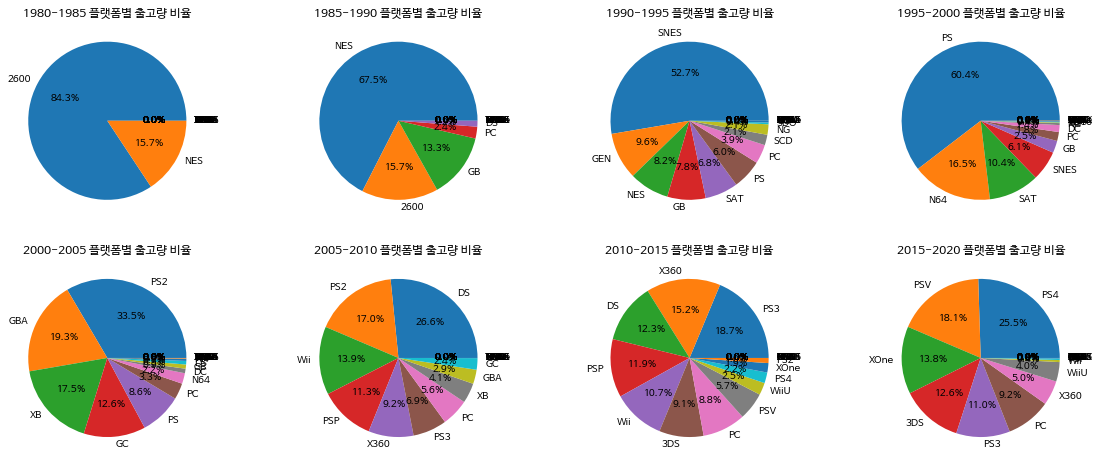

In [ ]:
# 5년 단위의 플랫폼 트렌드 분석

df_platform_demidecade = pd.crosstab(df.Platform, df.Demi_Decade)
plt.rc('font', family='NanumBarunGothic')

plt.figure(figsize=(20, 8))
plt.subplot(2,4,1)
plt.pie(df_platform_demidecade.sort_values(by='1980-1985', ascending=False)['1980-1985'],labels=df_platform_demidecade.sort_values(by='1980-1985', ascending=False).index, autopct='%.1f%%')
plt.title("1980-1985 플랫폼별 출고량 비율")
plt.subplot(2,4,2)
plt.pie(df_platform_demidecade.sort_values(by='1985-1990', ascending=False)['1985-1990'],labels=df_platform_demidecade.sort_values(by='1985-1990', ascending=False).index, autopct='%.1f%%')
plt.title("1985-1990 플랫폼별 출고량 비율")
plt.subplot(2,4,3)
plt.pie(df_platform_demidecade.sort_values(by='1990-1995', ascending=False)['1990-1995'],labels=df_platform_demidecade.sort_values(by='1990-1995', ascending=False).index, autopct='%.1f%%')
plt.title("1990-1995 플랫폼별 출고량 비율")
plt.subplot(2,4,4)
plt.pie(df_platform_demidecade.sort_values(by='1995-2000', ascending=False)['1995-2000'],labels=df_platform_demidecade.sort_values(by='1995-2000', ascending=False).index, autopct='%.1f%%')
plt.title("1995-2000 플랫폼별 출고량 비율")
plt.subplot(2,4,5)
plt.pie(df_platform_demidecade.sort_values(by='2000-2005', ascending=False)['2000-2005'],labels=df_platform_demidecade.sort_values(by='2000-2005', ascending=False).index, autopct='%.1f%%')
plt.title("2000-2005 플랫폼별 출고량 비율")
plt.subplot(2,4,6)
plt.pie(df_platform_demidecade.sort_values(by='2005-2010', ascending=False)['2005-2010'],labels=df_platform_demidecade.sort_values(by='2005-2010', ascending=False).index, autopct='%.1f%%')
plt.title("2005-2010 플랫폼별 출고량 비율")
plt.subplot(2,4,7)
plt.pie(df_platform_demidecade.sort_values(by='2010-2015', ascending=False)['2010-2015'],labels=df_platform_demidecade.sort_values(by='2010-2015', ascending=False).index, autopct='%.1f%%')
plt.title("2010-2015 플랫폼별 출고량 비율")
plt.subplot(2,4,8)
plt.pie(df_platform_demidecade.sort_values(by='2015-2020', ascending=False)['2015-2020'],labels=df_platform_demidecade.sort_values(by='2015-2020', ascending=False).index, autopct='%.1f%%')
plt.title("2015-2020 플랫폼별 출고량 비율")
plt.show()

상단의 파이차트들은 5년 단위의 플랫폼별 출고량 비율을 나타내고 있다

1980년부터 2005년까지는 각각 하나의 플랫폼이 압도적으로 높은 비율을 차지하고 있음을 확인할 수 있다

2005-2010 구간은 전보다는 고르게 분포하지만 DS 플랫폼이 가장 많은 비율을 차지하고 있음을 확인할 수 있다

2010-2015 구간은 플랫폼별로 차지하는 비율이 매우 고르게 분포한다고 볼 수 있다

마지막으로 2015-2020 구간에서는 PS4 플랫폼이 차지하는 비율이 다른 플랫폼들에 비해 가장 높아졌음을 확인할 수 있다

In [ ]:
print('5년 단위 연도와 플랫폼간 독립성 비교 p-value : ',chi2_contingency(df_platform_demidecade)[1])

5년 단위 연도와 플랫폼간 독립성 비교 p-value :  0.0


상단은 5년 단위의 연도(Demi-Decade)와 플랫폼별 판매량에 대해 카이제곱 독립성 검정을 시행한 결과이다

귀무가설 : 5년 단위의 연도와 플랫폼별 판매량 간에 관련이 없다 -> 연도에 따라 플랫의 트렌드가 변하지 않는다

대립가설 : 5년 단위의 연도와 플랫폼별 판매량 간에 관련이 있다 -> 연도에 따라 플랫폼의 트렌드가 변한다

결과를 보면 p-value 값이 0.05보다 작으므로 귀무가설을 기각하고 대립가설을 채택할 수 있다

즉 연도에 따라 플랫폼의 트렌드는 계속 변한다

3. 출고량이 높은 게임의 특징

In [ ]:
# Global_Sales top 100 찾기

df['Sales_Rank'] = df['Global_Sales'].rank(method='min', ascending=False)
df_top = df.sort_values(by='Sales_Rank', ascending=True).head(100)
df_top = df_top.reset_index(drop=True)
df_top

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Demi_Decade,Sales_Rank
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41490000.0,29020000.0,3770000.0,8460000.0,82740000.0,2005-2010,1.0
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29080000.0,3580000.0,6810000.0,770000.0,40240000.0,1985-1990,2.0
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15850000.0,12880000.0,3790000.0,3310000.0,35830000.0,2005-2010,3.0
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15750000.0,11010000.0,3280000.0,2960000.0,33000000.0,2005-2010,4.0
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11270000.0,8890000.0,10220000.0,1000000.0,31380000.0,1995-2000,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,Nintendo,3240000.0,1350000.0,2420000.0,430000.0,7440000.0,2010-2015,96.0
96,Call of Duty: World at War,X360,2008.0,Shooter,Activision,4790000.0,1900000.0,0.0,690000.0,7380000.0,2005-2010,97.0
97,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4460000.0,2130000.0,60000.0,690000.0,7340000.0,2010-2015,98.0
98,The Legend of Zelda: Twilight Princess,Wii,2006.0,Action,Nintendo,3830000.0,2190000.0,600000.0,700000.0,7320000.0,2005-2010,99.0


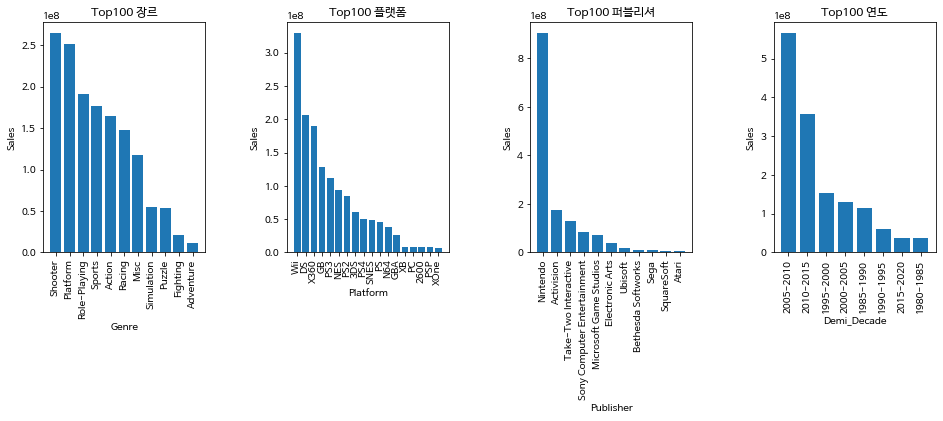

In [ ]:
# 출고량 Top 100에 대해 장르, 플랫폼, 퍼블리셔, 연도별 barplot 시각화

plt.figure(figsize=(16, 4))
plt.subplot(1,4,1)
plt.bar(df_top.groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False).index, df_top.groupby('Genre').sum().sort_values(by='Global_Sales', ascending=False)['Global_Sales'])
plt.title("Top100 장르")
plt.xticks(rotation='vertical')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.subplot(1,4,2)
plt.bar(df_top.groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False).index, df_top.groupby('Platform').sum().sort_values(by='Global_Sales', ascending=False)['Global_Sales'])
plt.title("Top100 플랫폼")
plt.xticks(rotation='vertical')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.subplot(1,4,3)
plt.bar(df_top.groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False).index, df_top.groupby('Publisher').sum().sort_values(by='Global_Sales', ascending=False)['Global_Sales'])
plt.title("Top100 퍼블리셔")
plt.xticks(rotation='vertical')
plt.xlabel('Publisher')
plt.ylabel('Sales')
plt.subplot(1,4,4)
plt.bar(df_top.groupby('Demi_Decade').sum().sort_values(by='Global_Sales', ascending=False).index, df_top.groupby('Demi_Decade').sum().sort_values(by='Global_Sales', ascending=False)['Global_Sales'])
plt.title("Top100 연도")
plt.xticks(rotation='vertical')
plt.xlabel('Demi_Decade')
plt.ylabel('Sales')
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

상단의 barplot들은 GlobalSales Top100에 대해 각각 장르, 플랫폼, 퍼블리셔 그리고 연도(5년단위)의 수치를 나타내고 있다

각각에 대해 순서대로 살펴보면 아래와 같은 결과를 확인할 수 있다

장르 : Shooter, Platform이 압도적으로 높은 비율을 차지한다

플랫폼 : Wii가 압도적으로 높은 비율을 차지한다

퍼블리셔 : Nintendo가 압도적으로 높은 비율을 차지한다

연도 : 2005-2010 구간이 압도적으로 높은 비율을 차지하며 그다음으로는 2010-2015 구간이 가장 높아 2005년부터 2015년까지의 출고량이 가장 많다

4. 각 지역별로 게임을 출시한다면 어떤 장르와 플랫폼을 선택하는 것이 좋은가


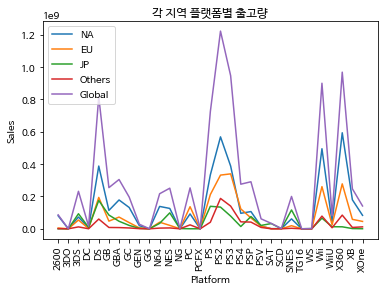

In [ ]:
# 각 지역별(글로벌 포함) 장르별 판매량 lineplot 시각화

df_platform = df.groupby('Platform')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']].sum()

fig, ax = plt.subplots()
ax.plot(df_platform.index, "NA_Sales", data=df_platform, label="NA")
ax.plot(df_platform.index, "EU_Sales", data=df_platform, label="EU")
ax.plot(df_platform.index, "JP_Sales", data=df_platform, label="JP")
ax.plot(df_platform.index, "Other_Sales", data=df_platform, label="Others")
ax.plot(df_platform.index, "Global_Sales", data=df_platform, label="Global")
plt.title('각 지역 플랫폼별 출고량')
plt.legend()
plt.xticks(rotation='vertical')
plt.xlabel('Platform')
plt.ylabel('Sales')
plt.show()

상단의 그래프를 통해 각 지역별로 가장 선호하는 플랫폼을 확인해보면 아래와 같다

북미 : X360

유럽 : PS3

일본 : DS

기타 : PS2

처음에 살펴봤던 지역별 선호 장르와 바로 앞에서 살펴본 지역별로 가장 선호하는 플랫폼을 종합해 생각해보면 다음와 같은 결론을 낼 수 있다

북미 : X360 플랫폼으로 Action, Sports, Shooter 장르의 게임 출시

유럽 : PS3 플랫폼으로 Action, Sports, Shooter 장르의 게임 출시

일본 : DS 플랫폼으로 Role-Playing 장르의 게임 출시

기타 : PS2 플랫폼으로 Action, Sports, Shooter 장르의 게임 출시

결론적으로 앞서 연도별 트렌드를 파악했을 때 2010년 이후 전세계적으로 Action 장르와 PS 플랫폼이 가장 높은 출고량 비율을 차지하고 있는데 상단의 지역별 분석을 보았을 때 하나의 지역을 선택한다면 유럽 지역에 PS 플랫폼을 통해 Action 장르의 게임을 출시하는 것이 가장 유리할 것이라고 볼 수 있다